In [3]:
import os
os.environ['DATA_PATH'] = '../../FeatureExtractionOutCube/'

import pandas as pd
pd.set_option('display.max_rows', 100)

import scipy
import seaborn as sns
import sys
sys.path.append('../nemo-eva/src/')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
dp1, dp2 = '../../FeatureExtractionOutCube/', '../../FeatureExtractionOutLCCMini3/'

In [8]:
df_clean = pd.read_csv(dp1 + '3-cleaned_features/results.csv')
df_clean.Info = df_clean.Info.apply(lambda temp: {'Info': temp} if '|' not in temp else {key: var for key, var in [x.split('=') for x in temp.split('|')]})
df_real = df_clean.loc[df_clean.Model == 'real-world']
df_clean['alpha'] = df_clean.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)
df_clean.shape


df1 = df_clean.loc[:, ['Graph', 'Nodes', 'Edges', 'Info', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean', 'Centrality.Degree.Location.Arithmetic Mean']]


df_clean = pd.read_csv(dp2 + '3-cleaned_features/results.csv')
df_clean.Info = df_clean.Info.apply(lambda temp: {'Info': temp} if '|' not in temp else {key: var for key, var in [x.split('=') for x in temp.split('|')]})
df_real = df_clean.loc[df_clean.Model == 'real-world']
df_clean['alpha'] = df_clean.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)
df_clean.shape


df2 = df_clean.loc[:, ['Graph', 'Nodes', 'Edges', 'Info', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean', 'Centrality.Degree.Location.Arithmetic Mean']]



# df_raw = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')
# import feature_cleaner
# graph_dicts = df_raw.to_dict('records')
# fc = feature_cleaner.FeatureCleaner(graph_dicts)
# fc.resultspath = './temp/results.csv'
# fc._stagepath = './temp/'
# fc.resultspath

(1881, 238)

(1881, 238)

In [9]:
df1.groupby('')

,Graph,Nodes,Edges,Info,alpha,Centrality.ClusteringCoefficient.Location.Arithmetic Mean,Centrality.Degree.Location.Arithmetic Mean
0,socfb-Bowdoin47,2250,84386,{'Info': 'no info'},None,0.288976,75.009778
1,socfb-Bowdoin47,2250,84242,{'Info': 'no info'},None,0.033257,74.881778
2,socfb-Bowdoin47,2250,84386,{'Info': 'no info'},None,0.082975,75.009778
3,socfb-Bowdoin47,2250,84386,{'Info': 'no info'},None,0.090188,75.009778
4,socfb-Bowdoin47,2235,84109,{'Info': 'no info'},None,0.082554,75.265324
...,...,...,...,...,...,...,...
1876,socfb-Rutgers89,24568,785262,"{'tau': '5.3323757485306285', 'alpha': '1.3152...",1.3152486642005756,0.222014,63.925594
1877,socfb-Rutgers89,24568,784341,"{'tau': '5.3323757485306285', 'alpha': '1.3704...",1.3704496788008564,0.221683,63.850619
1878,socfb-Rutgers89,24568,785366,"{'tau': '5.3323757485306285', 'alpha': '1.4875...",1.4875072632190585,0.222174,63.934061
1879,socfb-Rutgers89,24568,783038,"{'tau': '5.3323757485306285', 'alpha': '1.2956...",1.2956777001720823,0.219125,63.744546


In [19]:
df_clean.loc[:, ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean', 'Centrality.Degree.Location.Arithmetic Mean']].sort_values(['Graph', 'Model'])

,Graph,Model,Type,Nodes,Edges,alpha,Centrality.ClusteringCoefficient.Location.Arithmetic Mean,Centrality.Degree.Location.Arithmetic Mean
1164,bio-celegans,1d-cube-girg,bio,452,2007,2.113257388145947,0.660647,8.880531
1161,bio-celegans,1d-girg,bio,449,2000,2.427460648587142,0.637676,8.908686
1165,bio-celegans,2d-cube-girg,bio,451,2032,3.9215686274509802,0.671299,9.011086
1162,bio-celegans,2d-girg,bio,448,2027,3.4547908232118756,0.654841,9.049107
1163,bio-celegans,3d-girg,bio,448,2077,100.0,0.668323,9.272321
...,...,...,...,...,...,...,...,...
1191,web-webbase-2001,BA full,web,16062,25593,None,0.001381,3.186776
1189,web-webbase-2001,ER,web,15340,25625,None,0.000194,3.340939
1192,web-webbase-2001,chung-lu,web,11704,25084,None,0.036669,4.286398
1193,web-webbase-2001,hyperbolic,web,14096,19802,1.795735,0.223127,2.809591


In [5]:
df_clean.loc[1257].Info

{'tau': '2.604100935449141',
 'alpha': '2.7038445289395856',
 'const': '1.2771283677683574',
 'target_lcc': '0.6464630921565051',
 'fit_lcc': '0.6712435672272826',
 'fitting_time': '0.2077770233154297',
 'hist': '[(2.0, 0.5418299117559976), (3.9215686274509802, 0.7502020388664506), (2.6490066225165565, 0.6599827891883883), (3.162055335968379, 0.6848214378095011), (2.8828828828828823, 0.71309154265214), (2.76100086281277, 0.6880637685102278), (2.7038445289395856, 0.6540454422037603), (2.6761446790717125, 0.674254081729609), (2.6899232951560363, 0.6672508776435662), (2.696865946800105, 0.6752055712698382), (2.7038445289395856, 0.6540454422037603)]'}

In [55]:
df_clean['Graph'].nunique()

171

In [20]:
DP = os.environ['DATA_PATH']
all_df = pd.read_csv(DP + '4-classification_results/accuracies/all.csv').T
small_deg_df = pd.read_csv(DP + '4-classification_results/accuracies/avg-degree-le-30.csv').T
large_deg_df = pd.read_csv(DP + '4-classification_results/accuracies/avg-degree-gt-30.csv').T
socfb_df = pd.read_csv(DP + '4-classification_results/accuracies/socfb.csv').T
not_socfb_df = pd.read_csv(DP + '4-classification_results/accuracies/not-socfb.csv').T
for df in [all_df, small_deg_df, large_deg_df, socfb_df, not_socfb_df]:
    df.columns = df.iloc[0]
    df.drop(df.index[0], inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '../../FeatureExtractionOutCube/4-classification_results/accuracies/avg-degree-le-30.csv'

In [22]:
all_df.loc[:, ['ER', 'hyperbolic', '1d-girg', '2d-girg', '1d-cube-girg', '2d-cube-girg']]

features,ER,hyperbolic,1d-girg,2d-girg,1d-cube-girg,2d-cube-girg
"Betweenness,Closeness,Diameter Max - mean",0.880117,0.894737,0.839181,0.836257,0.818713,0.804094
"Betweenness,Closeness,Diameter Max - median",0.938596,0.888889,0.845029,0.847953,0.847953,0.847953
"Betweenness,Closeness,Diameter Max - stats",0.97076,0.874269,0.865497,0.874269,0.868421,0.877193
"Betweenness,Closeness,Effective Diameter - mean",0.789474,0.605263,0.602339,0.602339,0.584795,0.584795
"Betweenness,Closeness,Effective Diameter - median",0.918129,0.654971,0.847953,0.853801,0.847953,0.859649
...,...,...,...,...,...,...
"Nodes,Edges,Partition.Communities - stats",0.827485,0.888889,0.862573,0.859649,0.862573,0.859649
"Nodes,Edges,Partition.CoreDecomposition - mean",0.915205,0.871345,0.865497,0.856725,0.859649,0.847953
"Nodes,Edges,Partition.CoreDecomposition - median",0.842105,0.833333,0.804094,0.818713,0.795322,0.80117
"Nodes,Edges,Partition.CoreDecomposition - stats",0.964912,0.885965,0.877193,0.847953,0.853801,0.859649


In [61]:
all_df.loc[:, ['ER', 'hyperbolic', '1d-girg', '1d-cube-girg']]

features,ER,hyperbolic,1d-girg,1d-cube-girg
"Betweenness,Closeness,Diameter Max - mean",0.880117,0.894737,0.839181,0.818713
"Betweenness,Closeness,Diameter Max - median",0.938596,0.888889,0.845029,0.847953
"Betweenness,Closeness,Diameter Max - stats",0.97076,0.874269,0.865497,0.868421
"Betweenness,Closeness,Effective Diameter - mean",0.789474,0.605263,0.602339,0.584795
"Betweenness,Closeness,Effective Diameter - median",0.918129,0.654971,0.847953,0.847953
...,...,...,...,...
"Nodes,Edges,Partition.Communities - stats",0.827485,0.888889,0.862573,0.862573
"Nodes,Edges,Partition.CoreDecomposition - mean",0.915205,0.871345,0.865497,0.859649
"Nodes,Edges,Partition.CoreDecomposition - median",0.842105,0.833333,0.804094,0.795322
"Nodes,Edges,Partition.CoreDecomposition - stats",0.964912,0.885965,0.877193,0.853801


/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TtestResult(statistic=-0.6028799584746598, pvalue=0.726106984847162, df=114)

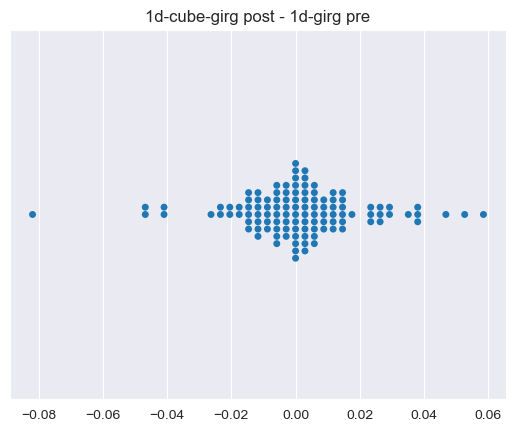

In [60]:
pret, postt = '1d-girg', '1d-cube-girg'
pre, post = all_df.loc[:, pret].to_numpy(), all_df.loc[:, postt].to_numpy()
fig = sns.swarmplot(post - pre).set_title(f'{postt} post - {pret} pre')
scipy.stats.ttest_rel(pre, post, alternative="greater")

In [37]:
DP

'../../FeatureExtractionOutCube/'

In [41]:
DP_old = '../../FeatureExtractionOutLCCMini3/'
all_df_old = pd.read_csv(DP_old + '4-classification_results/accuracies/all.csv').T

all_df_old.columns = all_df_old.iloc[0]
all_df_old.drop(all_df_old.index[0], inplace=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TtestResult(statistic=-2.390187431058854, pvalue=0.9907604971942187, df=114)

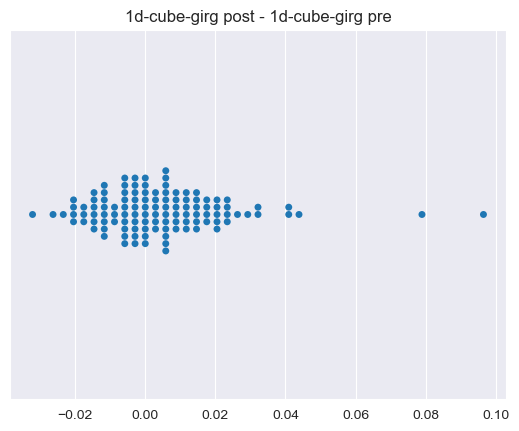

In [49]:
pret, postt = '1d-cube-girg', '1d-cube-girg'
pre, post = all_df_old.loc[:, pret].to_numpy(), all_df.loc[:, postt].to_numpy()
fig = sns.swarmplot(post - pre).set_title(f'{postt} post - {pret} pre')
scipy.stats.ttest_rel(pre, post, alternative="greater")

TtestResult(statistic=1.1296798496949787, pvalue=0.13049126743761563, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

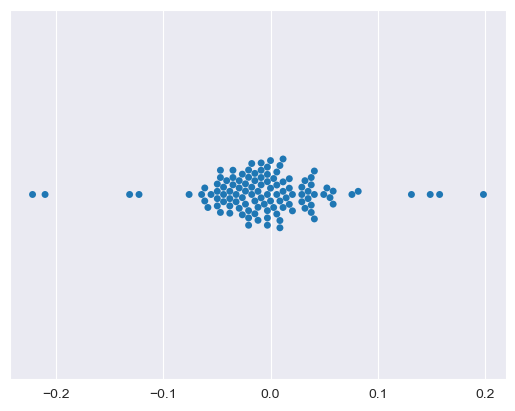

In [24]:
pre, post = all_df.loc[:, 'hyperbolic'].to_numpy(), all_df.loc[:, '2d-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=-1.8450211297955312, pvalue=0.9661849931468325, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

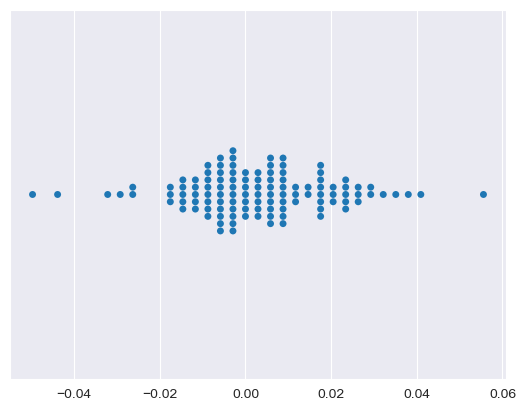

In [27]:
pre, post = all_df.loc[:, '1d-girg'].to_numpy(), all_df.loc[:, '3d-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=-0.6028799584746598, pvalue=0.726106984847162, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

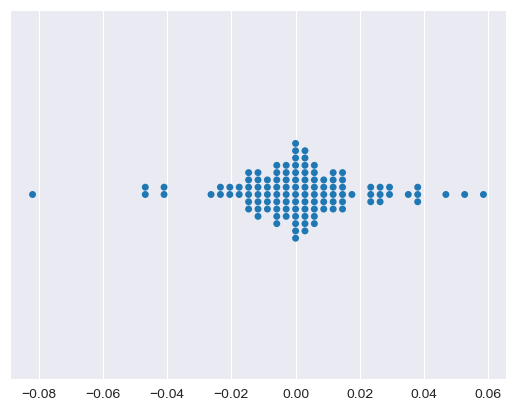

In [26]:
pre, post = all_df.loc[:, '1d-girg'].to_numpy(), all_df.loc[:, '1d-cube-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=-1.0937221104264812, pvalue=0.8618087258200979, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

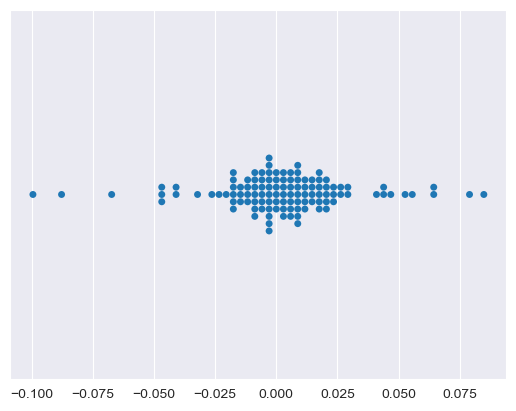

In [28]:
pre, post = all_df.loc[:, '2d-girg'].to_numpy(), all_df.loc[:, '2d-cube-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=-2.961915518981285, pvalue=0.9981393088533485, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

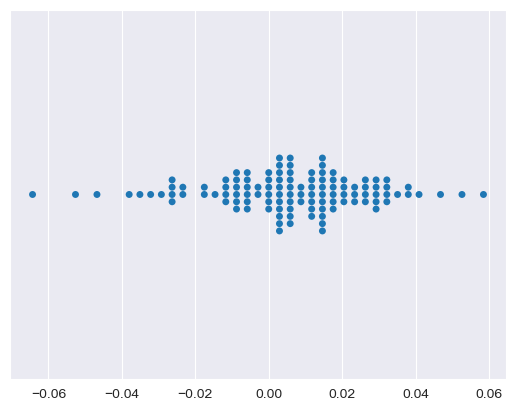

In [23]:
pre, post = all_df.loc[:, '1d-cube-girg'].to_numpy(), all_df.loc[:, '2d-cube-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=1.1239673038967637, pvalue=0.13169405196590808, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

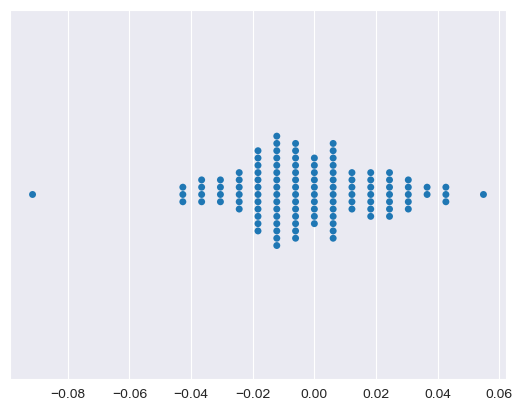

In [19]:
pre, post = all_df.loc[:, '1d-girg'].to_numpy(), all_df.loc[:, '2d-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=0.40228332380092463, pvalue=0.3441144065933724, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

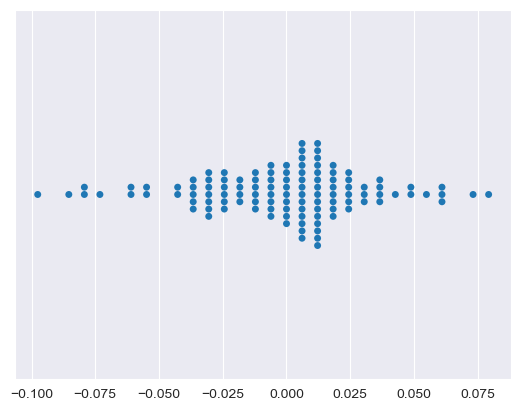

In [20]:
pre, post = all_df.loc[:, '2d-girg'].to_numpy(), all_df.loc[:, '2d-cube-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


In [27]:
socfb_df.loc[socfb_df.hyperbolic < 0.9, ['ER', 'hyperbolic', '1d-girg', '2d-girg', '3d-girg']]

features,ER,hyperbolic,1d-girg,2d-girg,3d-girg
"Betweenness,Closeness,Effective Diameter - mean",0.963636,0.863636,0.813636,0.831818,0.827273
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - mean",1.0,0.795455,0.786364,0.804545,0.813636
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - median",1.0,0.859091,0.872727,0.854545,0.859091
"Nodes,Edges - mean",0.495455,0.55,0.495455,0.495455,0.495455
"Nodes,Edges,Betweenness - mean",0.968182,0.581818,0.668182,0.618182,0.559091
"Nodes,Edges,Betweenness - median",0.927273,0.831818,0.986364,0.977273,0.972727
"Nodes,Edges,Betweenness,Closeness,Effective Diameter - mean",0.986364,0.836364,0.809091,0.809091,0.827273
"Nodes,Edges,Betweenness,Closeness,Effective Diameter - median",0.977273,0.872727,0.981818,0.968182,0.963636
"Nodes,Edges,Centrality.CoreDecomposition - median",0.986364,0.813636,0.790909,0.822727,0.813636
"Nodes,Edges,Closeness - mean",0.886364,0.709091,0.709091,0.695455,0.759091


In [29]:
not_socfb_df.loc[not_socfb_df.hyperbolic < 0.8, ['ER', 'hyperbolic', '1d-girg', '2d-girg', '3d-girg']]

features,ER,hyperbolic,1d-girg,2d-girg,3d-girg
"Betweenness,Closeness,Diameter Max - mean",0.738889,0.566667,0.505556,0.5,0.527778
"Betweenness,Closeness,Diameter Max - median",0.9,0.594444,0.633333,0.622222,0.672222
"Betweenness,Closeness,Diameter Max - stats",0.955556,0.661111,0.661111,0.666667,0.655556
"Betweenness,Closeness,Effective Diameter - mean",0.544444,0.6,0.516667,0.511111,0.522222
"Betweenness,Closeness,Effective Diameter - median",0.866667,0.6,0.638889,0.661111,0.666667
...,...,...,...,...,...
"Nodes,Edges,Partition.Communities - median",0.761111,0.688889,0.722222,0.705556,0.755556
"Nodes,Edges,Partition.Communities - stats",0.855556,0.716667,0.744444,0.727778,0.727778
"Nodes,Edges,Partition.CoreDecomposition - mean",0.833333,0.644444,0.666667,0.666667,0.694444
"Nodes,Edges,Partition.CoreDecomposition - median",0.716667,0.616667,0.65,0.65,0.65
